In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import os
import warnings
warnings.filterwarnings('ignore')

os.makedirs('models', exist_ok=True)

print("DATA PREPROCESSING")
print("="*60)

#load data
print("Step 1: Loading Dataset")
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn (1).csv')

print(f"Original shape: {df.shape}")
print(f"\nRows: {df.shape[0]}, Columns: {df.shape[1]}")
print(df.head())

DATA PREPROCESSING
Step 1: Loading Dataset
Original shape: (7043, 21)

Rows: 7043, Columns: 21
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic         

Step 2: Handling Missing Values
Initial missing values check:
Series([], dtype: int64)

Empty strings in TotalCharges: 11
After conversion - Missing values in TotalCharges: 11
Missing values imputed with median: 1397.47
Remaining missing values: 0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


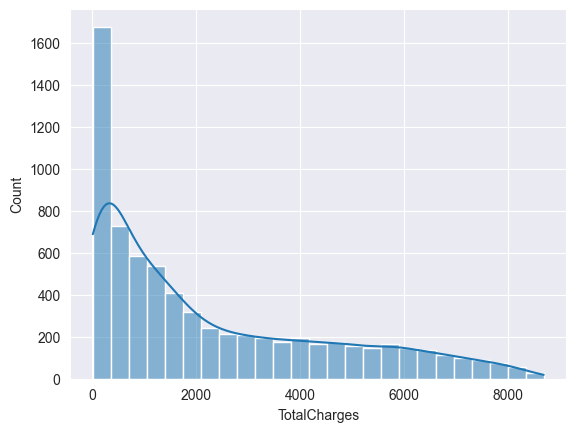

In [2]:
#handling missing values
print("Step 2: Handling Missing Values")
print("="*60)

#check missing values
print("Initial missing values check:")
print(df.isnull().sum()[df.isnull().sum()>0])

#total charges contains empty strings
print(f"\nEmpty strings in TotalCharges: {(df['TotalCharges'] ==' ').sum()}")

#convert Total charges to numeric
df['TotalCharges'] = df['TotalCharges'].replace(" ",np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print(f"After conversion - Missing values in TotalCharges: {df['TotalCharges'].isnull().sum()}")

sns.histplot(x=df.TotalCharges , kde=True ) #kde = a line above the graph.

#impute with median
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'] =df['TotalCharges'].fillna(median_total_charges)

print(f"Missing values imputed with median: {median_total_charges:.2f}")
print(f"Remaining missing values: {df.isnull().sum().sum()}")

# Verify no missing values remain
print(df.isnull().sum())
assert df.isnull().sum().sum() == 0, "Missing values still available!"


In [3]:
#remove duplicates
print("Step 3: Removing Duplicate Rows")
print("="*60)

rows = df.shape[0]
duplicate_count = df.duplicated().sum()

df=df.drop_duplicates()

print(f"Duplicate rows found: {duplicate_count}")
print(f"Rows before: {rows}")
print(f"Rows after: {df.shape[0]}")


Step 3: Removing Duplicate Rows
Duplicate rows found: 0
Rows before: 7043
Rows after: 7043


In [4]:
print("Step 4: Removing non-informative features")
print("="*60)

print("\nRemoving customerID column")
df= df.drop('customerID', axis=1)

print(f"CustomerID removed")
print(f"New shape: {df.shape}")
print(f"Remaining columns: {df.shape[1]}")


Step 4: Removing non-informative features

Removing customerID column
CustomerID removed
New shape: (7043, 20)
Remaining columns: 20


In [5]:
#analyze feature types
print("Step 5: Analyze feature types")
print("="*60)

numerical =df.select_dtypes(include=[np.number]).columns.tolist()
categorical = df.select_dtypes(include=['object']).columns.tolist()

#remove target from lists
if 'Churn' in categorical:
    categorical.remove('Churn')
print(f"\nNumerical features ({len(numerical)}):")
print(numerical)

print(f"\nCategorical features ({len(categorical)}):")
print(categorical)

print(f"\nTarget variable: Churn")



Step 5: Analyze feature types

Numerical features (4):
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Categorical features (15):
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Target variable: Churn


In [6]:
#saeperate features and target
print("Step 6: Separating features and target")
print("="*60)

x=df.drop('Churn',axis=1)
y=df['Churn']

print(f"Features (X) shape: {x.shape}")
print(f"Target (y) shape: {y.shape}")

print("\nTarget variable distribution:")
print(y.value_counts())
print("\nTarget variable percentage:")
print(y.value_counts(normalize=True) * 100)


Step 6: Separating features and target
Features (X) shape: (7043, 19)
Target (y) shape: (7043,)

Target variable distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Target variable percentage:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [7]:
#encode target variable
print("Step 7: Encoding target variable")
print("="*60)

le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)


print(f"Target variable encoded")
print(f"Encoding: {dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))}")
print(f"'No' -> 0, 'Yes' -> 1")

print("\nEncoded target distribution:")
print(pd.Series(y_encoded).value_counts().sort_index())


Step 7: Encoding target variable
Target variable encoded
Encoding: {'No': np.int64(0), 'Yes': np.int64(1)}
'No' -> 0, 'Yes' -> 1

Encoded target distribution:
0    5174
1    1869
Name: count, dtype: int64


In [8]:
#encoding categorical variables
print("Step 8: Encoding categorical variables")
print("="*60)

cat_encoded = x.copy()
label_encoders={}
for col in categorical:
    le= LabelEncoder()
    cat_encoded[col] = le.fit_transform(cat_encoded[col].astype(str))
    label_encoders[col]=le

    if categorical.index(col) < 6:
        print(f"\n{col}:")
        print(f"Original values: {x[col].unique()[:5]}")
        print(f"Encoded values: {cat_encoded[col].unique()[:5]}")

print(f"\nAll {len(categorical)} categorical features encoded")
print(f"Features shape after encoding: {cat_encoded.shape}")

print("\n Data types after encoding: ")
print(cat_encoded.dtypes.value_counts())

Step 8: Encoding categorical variables

gender:
Original values: ['Female' 'Male']
Encoded values: [0 1]

Partner:
Original values: ['Yes' 'No']
Encoded values: [1 0]

Dependents:
Original values: ['No' 'Yes']
Encoded values: [0 1]

PhoneService:
Original values: ['No' 'Yes']
Encoded values: [0 1]

MultipleLines:
Original values: ['No phone service' 'No' 'Yes']
Encoded values: [1 0 2]

InternetService:
Original values: ['DSL' 'Fiber optic' 'No']
Encoded values: [0 1 2]

All 15 categorical features encoded
Features shape after encoding: (7043, 19)

 Data types after encoding: 
int64      17
float64     2
Name: count, dtype: int64


In [17]:
#feature scaling
print("Step 9: Feature scaling (Standardization)")
print("="*60)

print("Applying StandardScalar to all features.")
#it transforms each feature as : Z= (x-mean)/std
#after scaling - mean=0, sd=1 [z-score normalization / standardization]

print("StandardScaler: Transforms features to mean=0, std=1")
scalar =StandardScaler()
x_scaled = scalar.fit_transform(cat_encoded)
#fit - calculate mean and std of every features
#transform - applies scaling
# result = A numpy array where all features are now standardized

#convert back to dataframe
x_scaled = pd.DataFrame(x_scaled, columns=cat_encoded.columns, index=cat_encoded.index)

print(f"Features scaled successfully")
print(f"Scaled features shape: {x_scaled.shape}")

print("\nBefore scaling (first 3 features):")
print(cat_encoded[cat_encoded.columns[:3]].describe().loc[['mean', 'std']])

print("\nAfter scaling (first 3 features):")
print(x_scaled[x_scaled.columns[:3]].describe().loc[['mean', 'std']])

#The tiny non-zero mean values (like −2.21e−17) are due to floating-point precision, not an error. they are very close to zero

Step 9: Feature scaling (Standardization)
Applying StandardScalar to all features.
StandardScaler: Transforms features to mean=0, std=1
Features scaled successfully
Scaled features shape: (7043, 19)

Before scaling (first 3 features):
        gender  SeniorCitizen   Partner
mean  0.504756       0.162147  0.483033
std   0.500013       0.368612  0.499748

After scaling (first 3 features):
            gender  SeniorCitizen       Partner
mean -2.219500e-17  -4.842546e-17  7.162933e-17
std   1.000071e+00   1.000071e+00  1.000071e+00


In [18]:
#Train-test split
print("Step 10: Train-test split")
print("="*60)

test_size =0.2 # 20% for testing
random_state= 42

print(f"Splitting data:")
print(f"Test size: {test_size*100}%")
print(f"Random state: {random_state}")

X_train, X_test, y_train, y_test = train_test_split(
    x_scaled,
    y_encoded, #encoded labels (0 = No Churn, 1 = Churn)
    test_size=test_size,
    random_state=random_state,
    stratify=y_encoded #Forces the split to maintain the original class proportions
)

print("Data split completed")
print(f"Training set: {X_train.shape[0]} samples ({(1-test_size)*100}%)")
print(f"Test set: {X_test.shape[0]} samples ({test_size*100}%)")

#display class distribution in splits

print(f"\nClass distribution in training set:")
train_dist = pd.Series(y_train).value_counts().sort_index()
print(f"   Class 0 (No Churn): {train_dist[0]} ({train_dist[0]/len(y_train)*100:.1f}%)")
print(f"   Class 1 (Churn): {train_dist[1]} ({train_dist[1]/len(y_train)*100:.1f}%)")

print(f"\nClass distribution in test set:")
test_dist = pd.Series(y_test).value_counts().sort_index()
print(f"   Class 0 (No Churn): {test_dist[0]} ({test_dist[0]/len(y_test)*100:.1f}%)")
print(f"   Class 1 (Churn): {test_dist[1]} ({test_dist[1]/len(y_test)*100:.1f}%)")

#This confirms that the split didn’t break the class balance.


Step 10: Train-test split
Splitting data:
Test size: 20.0%
Random state: 42
Data split completed
Training set: 5634 samples (80.0%)
Test set: 1409 samples (20.0%)

Class distribution in training set:
   Class 0 (No Churn): 4139 (73.5%)
   Class 1 (Churn): 1495 (26.5%)

Class distribution in test set:
   Class 0 (No Churn): 1035 (73.5%)
   Class 1 (Churn): 374 (26.5%)


Step 11: Handling class imbalance with SMOTE [Synthetic Minority Over-sampling Technique
Class imbalance detected in training data
Imbalance ratio: 2.77:1

Applying SMOTE to training data:
SMOTE applied successfully

Before SMOTE:
Class 0: 4139
Class 1: 1495
Total: 5634

After SMOTE
Class 0: 4139
Class 1: 4139
Total: 8278


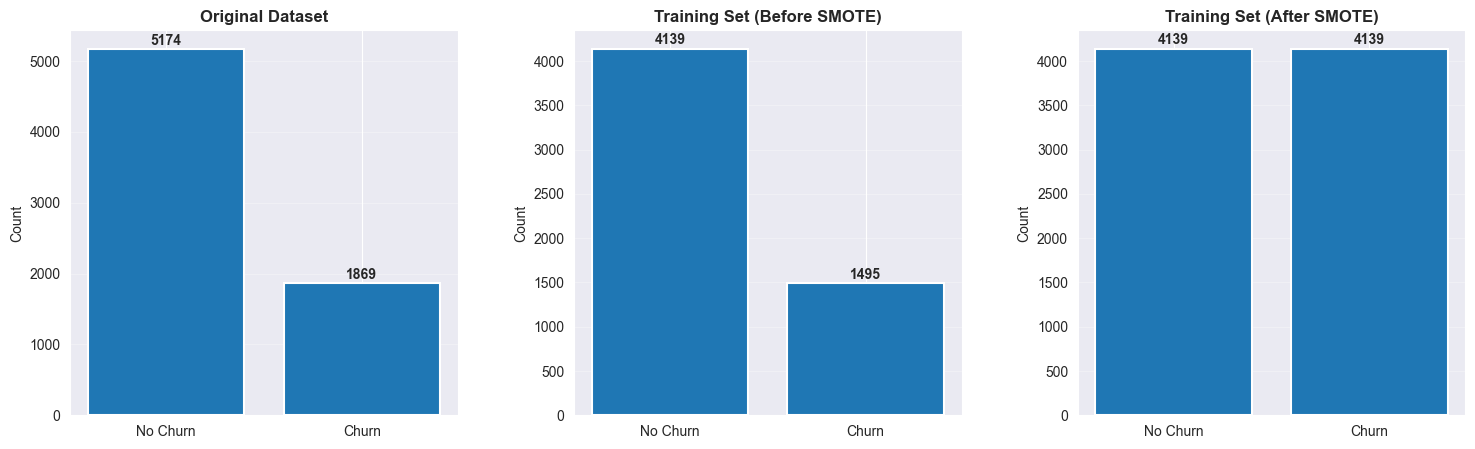

In [19]:
from imblearn.over_sampling import SMOTE

#handle class imbalance (SMOTE)
#smote -generates fake but realistic samples for the minority class

print("Step 11: Handling class imbalance with SMOTE [Synthetic Minority Over-sampling Technique")
print("="*60)


print("Class imbalance detected in training data")
print(f"Imbalance ratio: {train_dist[0]/train_dist[1]:.2f}:1")
#Calculates how many times bigger class 0 is compared to class 1.
#2.77:1 = majority class has X2.77 more samples

print("\nApplying SMOTE to training data:")
smote = SMOTE(random_state=random_state, k_neighbors=5)
#Uses 5 nearest neighbors to create synthetic data.
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"SMOTE applied successfully")

print(f"\nBefore SMOTE:")
print(f"Class 0: {train_dist[0]}")
print(f"Class 1: {train_dist[1]}")
print(f"Total: {len(y_train)}")

balanced_dist= pd.Series(y_train_balanced).value_counts().sort_index()

print(f"\nAfter SMOTE")
print(f"Class 0: {balanced_dist[0]}")
print(f"Class 1: {balanced_dist[1]}")
print(f"Total: {len(y_train_balanced)}")

#visualize class distribution
fig, axes = plt.subplots(1,3,figsize=(18,5))
#before split
axes[0].bar(['No Churn', 'Churn'],
            [len(y_encoded[y_encoded==0]), len(y_encoded[y_encoded==1])],
            linewidth=1.5)
axes[0].set_title('Original Dataset', fontweight='bold')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate([len(y_encoded[y_encoded==0]), len(y_encoded[y_encoded==1])]):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

#training set before SMOTE
axes[1].bar(['No Churn','Churn'],
            [train_dist[0], train_dist[1]],
            linewidth=1.5)
axes[1].set_title('Training Set (Before SMOTE)',fontweight='bold')
axes[1].set_ylabel('Count')
axes[1].grid(axis='y', alpha=0.3)

for i, v in enumerate([train_dist[0], train_dist[1]]):
    axes[1].text(i, v + 50, str(v), ha='center', fontweight='bold')

#training set after SMOTE
axes[2].bar(['No Churn', 'Churn'],
            [balanced_dist[0], balanced_dist[1]],linewidth=1.5)
axes[2].set_title('Training Set (After SMOTE)',fontweight='bold')
axes[2].set_ylabel('Count')
axes[2].grid(axis='y', alpha=0.3)
for i, v in enumerate([balanced_dist[0], balanced_dist[1]]):
    axes[2].text(i, v + 50, str(v), ha='center', fontweight='bold')

plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

In [27]:
#save preprocessed data
print("Step 12: Saving preprocessed data")
print("="*60)

import pickle
preprocessing_data= {
    'X_train' : X_train_balanced,
    'X_test': X_test,
    'y_train': y_train_balanced,
    'y_test': y_test,
    'scaler': scalar,
    'label_encoders': label_encoders,
    'target_encoder': le_target,
    'feature_names': cat_encoded.columns.tolist()
}

with open('models/preprocessed_data.pkl', 'wb') as f:
    pickle.dump(preprocessing_data, f)

print("Preprocessed data saved to: models/preprocessed_data.pkl")



Step 12: Saving preprocessed data
Preprocessed data saved to: models/preprocessed_data.pkl


In [22]:
#preprocessing summary
print("Preprocessing summary")
print("="*60)

summary = f"""
Data Preprocessing Completed
============================

Original Dataset:
  - Rows: {df.shape[0] + duplicate_count}
  - Columns: {df.shape[1] + 1}  (including customerID)

After Preprocessing:
  -Rows: {df.shape[0]}
  -Features: {cat_encoded.shape[1]}

Preprocessing Steps Applied:
  1.Handled {11} missing values in TotalCharges (median imputation)
  2.Removed {duplicate_count} duplicate rows
  3.Dropped customerID (non-informative)
  4.Encoded target variable (Yes->1, No->0)
  5.Encoded {len(categorical)} categorical features (Label Encoding)
  6.Scaled all features (StandardScaler: mean=0, std=1)
  7.Split data (80% train, 20% test) with stratification
  8.Applied SMOTE to balance training data

Final Dataset Shapes:
  - Training Features (X_train): {X_train_balanced.shape}
  - Training Labels (y_train): {y_train_balanced.shape}
  - Test Features (X_test): {X_test.shape}
  - Test Labels (y_test): {y_test.shape}

Class Distribution:
  - Original: {len(y_encoded[y_encoded==0])} No Churn, {len(y_encoded[y_encoded==1])} Churn
  - Training (Before SMOTE): {train_dist[0]} No Churn, {train_dist[1]} Churn
  - Training (After SMOTE): {balanced_dist[0]} No Churn, {balanced_dist[1]} Churn
  - Test (Unchanged): {test_dist[0]} No Churn, {test_dist[1]} Churn
"""

print(summary)

with open('results/preprocessing_summary.txt', 'w') as f:
    f.write(summary)
print("Summary saved to: results/preprocessing_summary.txt")

print("\n" + "="*70)
print("DATA PREPROCESSING COMPLETE - READY FOR MODEL TRAINING")

Preprocessing summary

Data Preprocessing Completed

Original Dataset:
  - Rows: 7043
  - Columns: 21  (including customerID)

After Preprocessing:
  -Rows: 7043
  -Features: 19

Preprocessing Steps Applied:
  1.Handled 11 missing values in TotalCharges (median imputation)
  2.Removed 0 duplicate rows
  3.Dropped customerID (non-informative)
  4.Encoded target variable (Yes->1, No->0)
  5.Encoded 15 categorical features (Label Encoding)
  6.Scaled all features (StandardScaler: mean=0, std=1)
  7.Split data (80% train, 20% test) with stratification
  8.Applied SMOTE to balance training data

Final Dataset Shapes:
  - Training Features (X_train): (8278, 19)
  - Training Labels (y_train): (8278,)
  - Test Features (X_test): (1409, 19)
  - Test Labels (y_test): (1409,)

Class Distribution:
  - Original: 5174 No Churn, 1869 Churn
  - Training (Before SMOTE): 4139 No Churn, 1495 Churn
  - Training (After SMOTE): 4139 No Churn, 4139 Churn
  - Test (Unchanged): 1035 No Churn, 374 Churn

Summar

In [28]:
print("Saving preprocessed dataset to CSV")
print("="*60)

train_df = pd.DataFrame(X_train_balanced,columns=cat_encoded.columns)
train_df['Churn'] = y_train_balanced

train_df.to_csv('results/train_preprocessed.csv', index=False)

test_df = pd.DataFrame(X_test, columns=cat_encoded.columns)
test_df['Churn'] = y_test

test_df.to_csv('results/test_preprocessed.csv', index=False)

print("Train CSV saved to: results/train_preprocessed.csv")
print("Test CSV saved to: results/test_preprocessed.csv")



Saving preprocessed dataset to CSV
Train CSV saved to: results/train_preprocessed.csv
Test CSV saved to: results/test_preprocessed.csv
